In [332]:
import pandas as pd
import math
from fancyimpute import KNN


In [373]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
full = pd.concat([train.drop(columns='Survived'), test], axis=0)
print(train.columns)
print(test.columns)
print(full.columns)
print(len(train), len(test), len(full))

test_passenger_ids = test['PassengerId']

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
891 418 1309


In [334]:
print(full.isna().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool


In [335]:
full[full['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


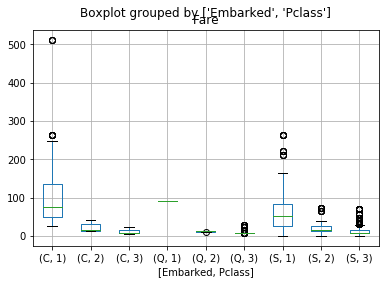

In [336]:
full.boxplot(column=['Fare'], by=['Embarked','Pclass'])

In [337]:
"""We can see that C1 corresponds most closely to Fare of $80
Thus we should replace the NaN value for Embarked column as 'C'"""

"We can see that C1 corresponds most closely to Fare of $80\nThus we should replace the NaN value for Embarked column as 'C'"

In [338]:
full.Embarked.fillna('C', inplace=True)
full[full['PassengerId'].isin([62,830]) ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


In [339]:
full[full['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [340]:
"""Dropping Cabin and Ticket columns as they doesn't seem to be useful"""
full.drop(columns=['Cabin'], inplace=True)
full.drop(columns=['Ticket'], inplace=True)

In [341]:
print(full.isna().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Fare            True
Embarked       False
dtype: bool


In [342]:
full.Embarked.unique()
#Replace the Embarked categorical feature by 3 features that represet one-hot encoding for Embarked

array(['S', 'C', 'Q'], dtype=object)

In [343]:
Embarked_S = [1 if i == 'S' else 0 for i in full.Embarked ]

In [344]:
Embarked_C = [1 if i=='C' else 0 for i in full.Embarked]

In [345]:
Embarked_Q = [1 if i=='Q' else 0 for i in full.Embarked]

In [346]:
full['Embarked_S'] = Embarked_S

In [347]:
full['Embarked_Q'] = Embarked_Q

In [348]:
full['Embarked_C'] = Embarked_C

In [349]:
full.drop(columns=['Embarked'], inplace=True)

In [350]:
#Replace Sex column with 1-hot encodings for it
male = [1 if i=='male' else 0 for i in full.Sex]
female = [1 if i=='female' else 0 for i in full.Sex]

In [351]:
full['male'] = male
full['female'] = female

In [352]:
full.drop(columns=['Sex'], inplace=True)

In [353]:
x_full = full.drop(columns=['PassengerId',  'Name'])

In [354]:
from fancyimpute import KNN
colnames = x_full.columns
x_full = pd.DataFrame(MICE().complete(x_full))

[MICE] Completing matrix with shape (1309, 10)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.004
[MICE] Starting imputation round 3/110, elapsed time 0.006
[MICE] Starting imputation round 4/110, elapsed time 0.008
[MICE] Starting imputation round 5/110, elapsed time 0.010
[MICE] Starting imputation round 6/110, elapsed time 0.011
[MICE] Starting imputation round 7/110, elapsed time 0.012
[MICE] Starting imputation round 8/110, elapsed time 0.014
[MICE] Starting imputation round 9/110, elapsed time 0.015
[MICE] Starting imputation round 10/110, elapsed time 0.016
[MICE] Starting imputation round 11/110, elapsed time 0.017
[MICE] Starting imputation round 12/110, elapsed time 0.018
[MICE] Starting imputation round 13/110, elapsed time 0.020
[MICE] Starting imputation round 14/110, elapsed time 0.022
[MICE] Starting imputation round 15/110, elapsed time 0.024
[MICE] Starting imputation round 16/110, elapsed time 0.025
[M

In [355]:
x_full.columns = colnames

In [356]:
x_full

,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,male,female
0,3.0,22.000000,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0,1.0,0.0,1.0
2,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.000000,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0
5,3.0,28.840013,0.0,0.0,8.4583,0.0,1.0,0.0,1.0,0.0
6,1.0,54.000000,0.0,0.0,51.8625,1.0,0.0,0.0,1.0,0.0
7,3.0,2.000000,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,0.0
8,3.0,27.000000,0.0,2.0,11.1333,1.0,0.0,0.0,0.0,1.0
9,2.0,14.000000,1.0,0.0,30.0708,0.0,0.0,1.0,0.0,1.0


In [357]:
#Add family-size feature
# x_full['family_size'] = x_full.apply(lambda row: row.SibSp + row.Parch+1, axis=1)


In [358]:
x_full

,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,male,female
0,3.0,22.000000,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0,1.0,0.0,1.0
2,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.000000,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0
5,3.0,28.840013,0.0,0.0,8.4583,0.0,1.0,0.0,1.0,0.0
6,1.0,54.000000,0.0,0.0,51.8625,1.0,0.0,0.0,1.0,0.0
7,3.0,2.000000,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,0.0
8,3.0,27.000000,0.0,2.0,11.1333,1.0,0.0,0.0,0.0,1.0
9,2.0,14.000000,1.0,0.0,30.0708,0.0,0.0,1.0,0.0,1.0


In [359]:
print(x_full.isna().any())

Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked_S    False
Embarked_Q    False
Embarked_C    False
male          False
female        False
dtype: bool


In [360]:
X_train = x_full[:891]
X_test = x_full[891:]
print(len(X_train))
print(len(X_test))

891
418


In [381]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss

classifiers = [
    KNeighborsClassifier(3),
    LinearSVC(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)



In [382]:
Y_train = train.Survived
acc_dict = {}

In [383]:
for train_index, val_index in sss.split(X_train, Y_train):
    x_tr, x_va = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_va = Y_train.iloc[train_index], Y_train.iloc[val_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(x_tr, y_tr)
        predictions = clf.predict(x_va)
        acc = accuracy_score(y_va, predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]/10.0
    
print(acc_dict)

{'KNeighborsClassifier': 0.7166666666666667, 'LinearSVC': 0.7466666666666666, 'SVC': 0.7233333333333334, 'DecisionTreeClassifier': 0.7711111111111111, 'RandomForestClassifier': 0.8033333333333333, 'AdaBoostClassifier': 0.8011111111111111, 'GradientBoostingClassifier': 0.8133333333333332, 'GaussianNB': 0.7788888888888887, 'LogisticRegression': 0.7933333333333332}


In [371]:
#It seems that GradientBoostingClassifier performs the best
#We'll use that to do our predictions

final_predictions = []
for clf in classifiers:
    if clf.__class__.__name__ == 'GradientBoostingClassifier':
        final_predictions = clf.predict(X_test)

In [372]:
final_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [374]:
result = pd.DataFrame()
result['PassengerId'] = test_passenger_ids
result['Survived'] = final_predictions

In [375]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [377]:
result.to_csv('result_1.csv', index=False)